# Parcial 3

Cristian F. Zapata

In [8]:
import numpy as np      #util para matrices y otrasfuciones matematicas
from scipy.stats import f  #prueva f
from scipy.stats import t  #prueva t
from scipy.stats import norm  #distribucion normal
import pandas as pd              #Para trabajar con bases de datos 
from scipy.stats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

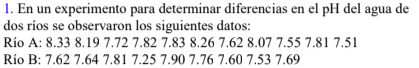

In [2]:
#Datos escritos como un vector 
rio_A = np.array([8.33, 8.19, 7.72, 7.82, 7.83, 8.26, 7.62, 8.07, 7.55, 7.81, 7.51])
rio_B = np.array([7.62, 7.64, 7.81, 7.25, 7.90, 7.76, 7.60, 7.53, 7.69])

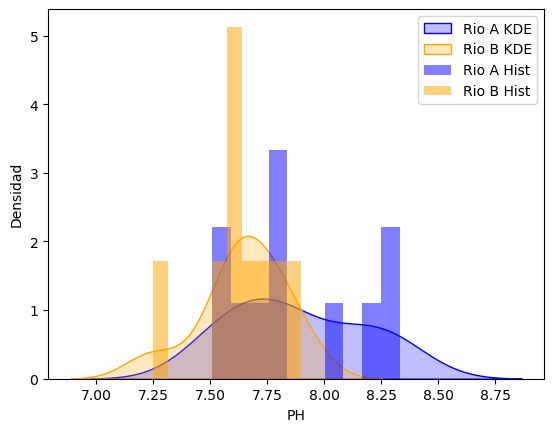

In [9]:
# Crear histograma suavizado con Seaborn (Estimacion de kernel de densidad)
sns.kdeplot(rio_A, label='Rio A KDE', color='blue', fill=True)
sns.kdeplot(rio_B, label='Rio B KDE', color='orange', fill=True)

# Crear histogramas normales con matplotlib
plt.hist(rio_A, bins=10, alpha=0.5, label='Rio A Hist', color='blue', density=True)
plt.hist(rio_B, bins=10, alpha=0.5, label='Rio B Hist', color='orange', density=True)

# Añadir etiquetas y leyenda
plt.xlabel('PH')
plt.ylabel('Densidad')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

## A) 
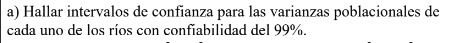


In [10]:
# Tamaños de las muestras
n_A = len(rio_A)
n_B = len(rio_B) 
            
# Varianzas muestrales
varianza_A = np.var(rio_A, ddof=1)
varianza_B = np.var(rio_B, ddof=1)

# Grados de libertad
grados_libertad_A = n_A - 1
grados_libertad_B = n_B - 1

# Niveles de confianza
confianza = 0.99

# Percentiles de la distribución chi-cuadrado
chi_cuadrado_alpha_2_A = stats.chi2.ppf((1 - confianza) / 2, df=grados_libertad_A)
chi_cuadrado_1_minus_alpha_2_A = stats.chi2.ppf(1 - (1 - confianza) / 2, df=grados_libertad_A)

chi_cuadrado_alpha_2_B = stats.chi2.ppf((1 - confianza) / 2, df=grados_libertad_B)
chi_cuadrado_1_minus_alpha_2_B = stats.chi2.ppf(1 - (1 - confianza) / 2, df=grados_libertad_B)

# Intervalo de confianza para las varianzas
intervalo_confianza_varianza_A = (
    (n_A - 1) * varianza_A / chi_cuadrado_1_minus_alpha_2_A,
    (n_A - 1) * varianza_A / chi_cuadrado_alpha_2_A
)

intervalo_confianza_varianza_B = (
    (n_B - 1) * varianza_B / chi_cuadrado_1_minus_alpha_2_B,
    (n_B - 1) * varianza_B / chi_cuadrado_alpha_2_B
)

# Imprimir resultados
print("Intervalo de confianza para la varianza del Río A:", intervalo_confianza_varianza_A)
print("Intervalo de confianza para la varianza del Río B:", intervalo_confianza_varianza_B)

Intervalo de confianza para la varianza del Río A: (0.03291298521393322, 0.3845423797953808)
Intervalo de confianza para la varianza del Río B: (0.01272706877974011, 0.20783955833296944)


## B)
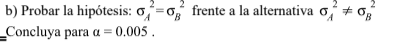

In [8]:
varianza_A = np.var(rio_A, ddof=1)
varianza_B = np.var(rio_B, ddof=1)

# Calcula el estadístico F y el valor p para la prueba F
estadistico_F = varianza_B / varianza_A
grados_libertad_A = len(rio_A) - 1
grados_libertad_B = len(rio_B) - 1

valor_p = 2 * min(f.cdf(estadistico_F, grados_libertad_A, grados_libertad_B), 1 - f.cdf(estadistico_F, grados_libertad_A, grados_libertad_B))

print("Valor p y estadistico F:", valor_p, estadistico_F)

nivel_significancia = 0.005
if valor_p < nivel_significancia:
    print("Rechazamos la hipótesis nula. Hay evidencia suficiente para afirmar que las varianzas de las mediciones de los dos instrumentos no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que las varianzas de las mediciones de los dos instrumentos son diferentes.")

Valor p y estadistico F: 0.20076834270575727 0.4213149788967843
No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que las varianzas de las mediciones de los dos instrumentos son diferentes.


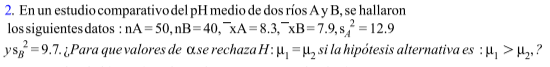

Es muy probable que las varianzas poblacionales sean diferentes, ya que los rios van a pasar por lugares diferetes que podrian afectar al medir los PHs.
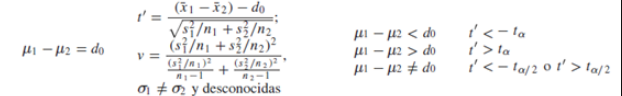

In [5]:
media_A=8.3
varianza_A=12.9
n_A=50

media_B=7.9
varianza_B=9.7
n_B=40

# Calcula la estadística de prueba t de Welch
t_statistic_welch = (media_A - media_B) / ((varianza_A/n_A + varianza_B/n_B)**0.5)

# Grados de libertad usando la aproximación de Welch-Satterthwaite
grados_libertad_welch = ((varianza_A/n_A + varianza_B/n_B)**2) / ((varianza_A**2 / (n_A**2 * (n_A - 1))) + (varianza_B**2 / (n_B**2 * (n_B - 1))))

# Imprimir el estadístico de prueba 
print("Estadístico de prueba t de welch:", t_statistic_welch,"grados libertad welch=", grados_libertad_welch)

Estadístico de prueba t de welch: 0.5654027941921761 grados libertad welch= 87.39493950002483


In [7]:
valor_p = 1 - t.cdf(t_statistic_welch, grados_libertad_welch)
print("para valores de alfa mayores a", valor_p, "se rechaza la hipotesis nula")

para valores de alfa mayores a 0.2866242596970725 se rechaza la hipotesis nula


In [4]:
#Ejemplo

alfa=valor_p + 0.01  #Es solo un valor de prueba

# Imprimir el valor crítico y tomar una decisión
if valor_p < alfa:
    print("Rechazar la hipótesis nula")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula")

Rechazar la hipótesis nula


Tambien se hizo el procedimieto considerando varianzas polacionales iguales, y el resultado fue muy similar. Para ambos casos, para alfas mayores a aproximadamente 0.28, se rechaza la hipotesis nula 

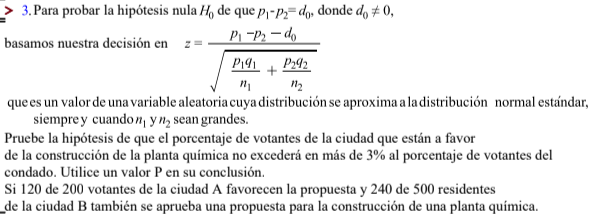

In [18]:
x1=120
n1=200
p1=x1/n1
q1=1 - p1

x2=240
n2=500
p2=x2/n2
q2=1 - p2

d0=0.03

z= (p1 - p2 - d0) / np.sqrt( p1*q1/n1 + p2*q2/n2)

print("Para las probabilidades de voto a favor o encontra, p1=", p1 ,"q1=", q1 , "p2=", p2 ,"q2=", q2, "El estadistico de z tiene un valor:", z)

Para las probabilidades de voto a favor o encontra, p1= 0.6 q1= 0.4 p2= 0.48 q2= 0.52 El estadistico de z tiene un valor: 2.1833344115234325


In [19]:
p_valor = 1 - norm.cdf(abs(z))
nivel_significancia=0.05

if p_valor < nivel_significancia:
    print("Con un nivel de significancia de",nivel_significancia ,"Rechazamos la hipótesis nula ya que el valor p es:", p_valor)
    print("El porcentaje excede 3%")
else:
    print("Con un nivel de significancia de",nivel_significancia , "No podemos rechazar la hipótesis nula, ya que el valor p es:", p_valor)
    print("El no porcentaje excede 3%")

Con un nivel de significancia de 0.05 Rechazamos la hipótesis nula ya que el valor p es: 0.014505596085829908
El porcentaje excede 3%


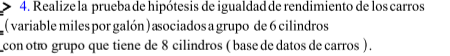

In [19]:
df = pd.read_csv(r"\Users\Admin\carros_datos.csv")

In [20]:
df.head() #muestra primeras 5 filas

,Unnamed: 0,miles por galon,MOTOR,"fuerza,caballos","peso,kg",acceleracion,"modelo,año",pais,numero de
0,1,18.0,307,130.0,3504,12,70,1.0,8.0
1,2,15.0,350,165.0,3693,12,70,1.0,8.0
2,3,18.0,318,150.0,3436,11,70,1.0,8.0
3,4,16.0,304,150.0,3433,12,70,1.0,8.0
4,5,17.0,302,140.0,3449,11,70,1.0,8.0


In [21]:
#cambiar nombres de las caracteristicas
df = df.rename(columns = {"miles por galon":"Consumo", "MOTOR":"Motor", "fuerza,caballos":"Caballos_fuerza", "peso,kg":"Peso(Kg)","acceleracion":"Aceleracion", "modelo,año":"Modelo", "pais":"Pais", "numero de ":"Numero_de_cilindros"})

In [22]:
df

,Unnamed: 0,Consumo,Motor,Caballos_fuerza,Peso(Kg),Aceleracion,Modelo,Pais,Numero_de_cilindros
0,1,18.0,307,130.0,3504,12,70,1.0,8.0
1,2,15.0,350,165.0,3693,12,70,1.0,8.0
2,3,18.0,318,150.0,3436,11,70,1.0,8.0
3,4,16.0,304,150.0,3433,12,70,1.0,8.0
4,5,17.0,302,140.0,3449,11,70,1.0,8.0
...,...,...,...,...,...,...,...,...,...
401,402,27.0,140,86.0,2790,16,82,1.0,4.0
402,403,44.0,97,52.0,2130,25,82,2.0,4.0
403,404,32.0,135,84.0,2295,12,82,1.0,4.0
404,405,28.0,120,79.0,2625,19,82,1.0,4.0


In [23]:
#Borrar las filas que no necesito
df.drop(columns = ["Unnamed: 0", "Motor","Caballos_fuerza","Peso(Kg)","Aceleracion","Modelo","Pais"],inplace=True)

In [24]:
#Descripcion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Consumo              398 non-null    float64
 1   Numero_de_cilindros  405 non-null    float64
dtypes: float64(2)
memory usage: 6.5 KB


Las dos variables tienen numero total de datos diferente, entonces hay datos nulos (NAN) que deberian ser reemplazados de alguna manera, o borrarlos.
Vamos a borrar las filas que tengan datos faltantes

In [25]:
#Borrar datos NAN
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 405
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Consumo              397 non-null    float64
 1   Numero_de_cilindros  397 non-null    float64
dtypes: float64(2)
memory usage: 9.3 KB


Vamos a separa los datos en dos grupos, los e 6 y 8 cilindros

In [26]:
df_6c= df.loc[df['Numero_de_cilindros'] == 6]

df_8c = df.loc[df['Numero_de_cilindros'] == 8]

In [27]:
df_6c

,Consumo,Numero_de_cilindros
21,22.0,6.0
22,18.0,6.0
23,21.0,6.0
30,21.0,6.0
40,19.0,6.0
...,...,...
373,20.0,6.0
374,18.0,6.0
394,25.0,6.0
395,38.0,6.0


In [28]:
df_8c

,Consumo,Numero_de_cilindros
0,18.0,8.0
1,15.0,8.0
2,18.0,8.0
3,16.0,8.0
4,17.0,8.0
...,...,...
298,19.0,8.0
299,19.0,8.0
305,23.0,8.0
307,24.0,8.0


In [29]:
#voy a borrar la columna Numero_de_cilindros, ya que ya tengo los datos separados
df_6c.drop(columns = ["Numero_de_cilindros"],inplace=True)
df_8c.drop(columns = ["Numero_de_cilindros"],inplace=True)

print("6 cilindros:")
print( df_6c)
print("8 cilindros:")
print(df_8c)

6 cilindros:
     Consumo
21      22.0
22      18.0
23      21.0
30      21.0
40      19.0
..       ...
373     20.0
374     18.0
394     25.0
395     38.0
397     22.0

[84 rows x 1 columns]
8 cilindros:
     Consumo
0       18.0
1       15.0
2       18.0
3       16.0
4       17.0
..       ...
298     19.0
299     19.0
305     23.0
307     24.0
372     27.0

[102 rows x 1 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_6012\3461914814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6c.drop(columns = ["Numero_de_cilindros"],inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6012\3461914814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8c.drop(columns = ["Numero_de_cilindros"],inplace=True)


El mensaje de advertencia es porque no hice una copia antes de modificar

In [30]:
#convertir datos en un vector 
df_6c=df_6c.to_numpy(dtype=None, copy=False)
df_8c=df_8c.to_numpy(dtype=None, copy=False)

In [31]:
#Media de los datos
media6=df_6c.mean()
media8=df_8c.mean()
print("consumo promedio de 6 cilindros: ", media6 )
print("consumo promedio de 8 cilindros: ", media8 )

consumo promedio de 6 cilindros:  20.05952380952381
consumo promedio de 8 cilindros:  15.07843137254902


In [32]:
#Varianzas
var6 = np.var(df_6c, ddof=1)  
var8 = np.var(df_8c, ddof=1)
print("La varianza del consumo  de 6 cilindros: ", var6 )
print("la varianza del consumo  de 8 cilindros: ", var8 )

La varianza del consumo  de 6 cilindros:  14.659064830751579
la varianza del consumo  de 8 cilindros:  7.993787614055524


<Axes: xlabel='Consumo', ylabel='Count'>

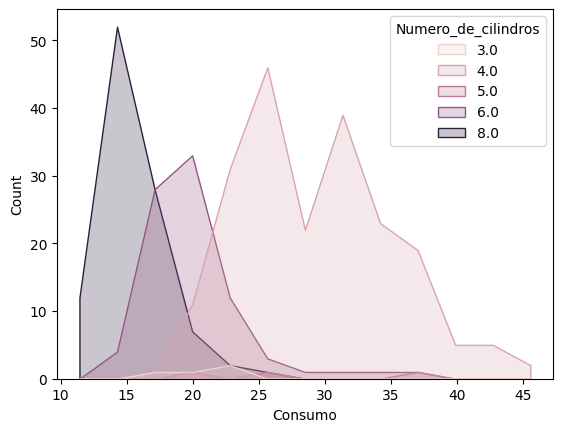

In [33]:
#histograma para ver la varianza muestral segun el numero de cilindros
sns.histplot(df, x="Consumo", hue="Numero_de_cilindros", element="poly") 

Los vehiculos son de paises diferentes, con especificaciones diferentes. Es probable que las varianzas de las poblaciones sean diferentes


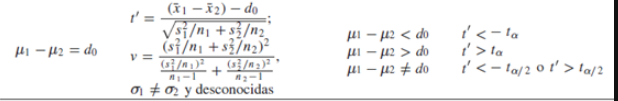

H0 mu1 = mu1, 
H1 mu =! mu2

In [34]:
#Calcula el estadistico t y valor p
t_stat, p_value = ttest_ind(df_6c, df_8c, equal_var=False)
print("Estadistico t = ", t_stat,  "Valor p = ", p_value)

Estadistico t =  [9.9052322] Valor p =  [4.26811421e-18]


In [35]:
nivel_significancia=0.05

if p_value < nivel_significancia:
    print(f"Rechazamos la hipótesis nula.  El consumo medio de los vehivulos de 6 y 8 cilindros no es el mismo")
else:
    print(f"No podemos rechazar la hipótesis nula. El consumo medio de los vehivulos de 6 y 8 cilindros es el mismo")

Rechazamos la hipótesis nula.  El consumo medio de los vehivulos de 6 y 8 cilindros no es el mismo


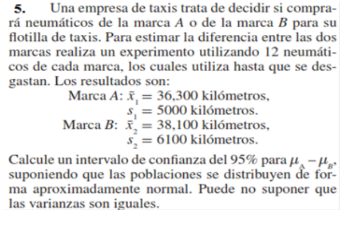

In [12]:
# Datos para la marca A
n_A = 12
media_A = 36300
desviacion_A = 5000

# Datos para la marca B
n_B = 12
media_B = 38100
desviacion_B = 6100

# Grados de libertad ajustados
grados_libertad = (
    ((desviacion_A**2 / n_A) + (desviacion_B**2 / n_B))**2 /
    (((desviacion_A**2 / n_A)**2 / (n_A - 1)) + ((desviacion_B**2 / n_B)**2 / (n_B - 1)))
)

# Valor crítico de la distribución t de Welch para un intervalo de confianza del 95%
t_critico = stats.t.ppf(0.975, df=grados_libertad)

# Intervalo de confianza de Welch
intervalo_inferior = (media_A - media_B) - t_critico * np.sqrt( (desviacion_A**2 / n_A) + (desviacion_B**2 / n_B))
intervalo_superior = (media_A - media_B) + t_critico * np.sqrt((desviacion_A**2 / n_A) + (desviacion_B**2 / n_B))

# Imprimir resultados
print("Intervalo de confianza del 95% para μA - μB:", (intervalo_inferior, intervalo_superior))
print("Con un t critico:", t_critico, "y", grados_libertad, "grados de libertad")

Intervalo de confianza del 95% para μA - μB: (-6532.5216303418865, 2932.5216303418865)
Con un t critico: 2.0785148418027646 y 21.183948011929438 grados de libertad


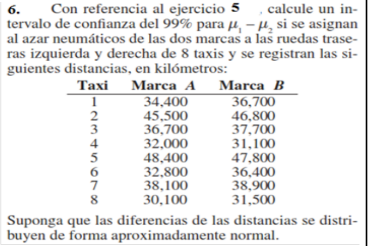

es el caso de medidas apareadas

In [26]:
# Distancias observadas
distancias_marca_A = np.array([34400, 45500, 36700, 32000, 48400, 32800, 38100, 30100])
distancias_marca_B = np.array([36700, 46800, 37700, 31100, 47800, 36400, 38900, 31500])

# Calcula las diferencias pareadas
diferencias_pareadas = distancias_marca_A - distancias_marca_B

# Tamaño de la muestra
n = len(diferencias_pareadas)

# Media y desviación estándar de las diferencias
media_diferencias = np.mean(diferencias_pareadas)
desviacion_estandar_diferencias = np.std(diferencias_pareadas, ddof=1)

# Grados de libertad
grados_libertad = n - 1

# Valor crítico de la distribución t para un intervalo de confianza del 99%
t_critico = stats.t.ppf(0.995, df=grados_libertad)

# Intervalo de confianza para la diferencia de medias
intervalo_inferior = media_diferencias - t_critico * (desviacion_estandar_diferencias / np.sqrt(n))
intervalo_superior = media_diferencias + t_critico * (desviacion_estandar_diferencias / np.sqrt(n))

# Imprimir resultados
print("Intervalo de confianza del 99% para μ1 - μ2:", (intervalo_inferior, intervalo_superior))
print("Con un t critico =",t_critico, "media de las diferencias=", media_diferencias, "y desviacion estandar de las diferencias=", desviacion_estandar_diferencias  )

Intervalo de confianza del 99% para μ1 - μ2: (-2912.0715234621966, 687.0715234621969)
Con un t critico = 3.4994832973505026 media de las diferencias= -1112.5 y desviacion estandar de las diferencias= 1454.4881279287617
